## 파이썬과 판다스를 활용한 실전 데이터 분석

이번 과제는 캐글의 에이비엔비(https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)데이터를 더 깊게 분석합니다.

데이터 사이언티스트로서 데이터를 분석할 때 가장 필수적인 스킬은 프로그래밍 언어 파이썬([Python](https://www.python.org/)), 데이터 분석 패키지 판다스([Pandas](https://pandas.pydata.org/)), 그리고 데이터 시각화 패키지 씨본([Seaborn](https://seaborn.pydata.org))과 [matplotlib](https://matplotlib.org)입니다. 데이터 분석가는 언제나 주변 동료들의 요청(ex: 운영팀, 재무팀, 마케팅팀)에 맞게 데이터를 뽑아내 그 통계치를 제공하고 시각화 결과를 전달해줘야 하는데, 파이썬과 판다스, 시각화 스킬이 부족하면 주어진 시간 내에 이를 전달해 줄 수 없습니다.

2008년부터 게스트와 호스트는 에어비앤비를 사용하여 여행 가능성을 확장하고 더 독특하고 개인화된 세상 경험 방법을 제시해 왔습니다. 이 데이터 세트는 2019년 뉴욕 NYC의 상장 활동 및 지표를 설명합니다.
이 데이터 파일에는 호스트, 지리적 가용성, 예측을 하고 결론을 도출하는 데 필요한 메트릭에 대해 자세히 알아보는 데 필요한 모든 정보가 포함되어 있습니다. 결국 뉴욕 에어비앤비 숙소에 대해 가격을 예측하는 회귀분석 프로젝트 입니다.

* **이번 분석의 목표는 에어비앤비를 새롭게 시작하고픈 신규 사업자 분들을 대상으로 컨설팅 자료를 만들어 보고자 합니다.**
* **우선 저희측에 컨설팅을 제안한 고객의 희망사항을 바탕으로 분석을 진행해보면 될 것입니다.**

#### 고객의 희망사항
* **저렴한 숙박료로 운영의 희망**
* **자본이 넉넉하지 않기 때문에 에어비앤비 방을 1인실 혹은 2인실로 인테리어를 구성희망**

문제를 풀 때 구글에 검색하는 것 모두 허용합니다. (문제 중에는 구글에 검색하지 않으면 풀 수 없는 문제도 몇 개 준비해놓았습니다) 관련 자료는 [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) 를 강력 추천합니다.

## 칼럼 설명

* **id** : 일련번호
* **name** : 에어비엔비 이름
* **host_id** : 호스트 id
* **host_name** : 호스트 성명
* **neighbourhood_group** : 지구 명
* **neighbourhood** : 지역명
* **latitude** : 위도
* **longitude** : 경도
* **room_type** : 방 타입
* **price** : 가격
* **minimum_nights** : 최소 숙박일수
* **number_of_reviews** : 리뷰 개수
* **last_reviews** : 최근 리뷰 일자
* **reviews_per_month** : 월 평균 리뷰 수
* **calculated_host_listings_count** : 호스트에게 대여 가능한 에어비엔비의 총 개수
* **availability_365** : 1년 중 가능한 대여일수

## 라이브러리 불러오기

In [1]:
# 데이터 시각화 패키지 matplotlib에게 inline출력,
# 즉 시각화 결과를 파일로 저장하거나 하지 않고 화면에 바로 출력하도록 명령합니다.
# (Seaborn이 matplotlib를 기반으로 동작하기 때문에, Seaborn에도 동일한 명령이 전달됩니다.)
%matplotlib inline

# 파이썬의 데이터 분석 패키지 판다스(Pandas)를 가져오고, 이를 pd라는 이름의 축약어로 사용합니다.
import pandas as pd
import numpy as np

# 파이썬의 데이터 시각화 패키지 시본(Seaborn)을 가져오고, 이를 sns라는 이름의 축약어로 사용합니다.
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## 데이터 불러오기

In [2]:
# 판다스의 'read_csv' 함수를 활용하여 데이터를 불러옵니다. 불러올때 변수명은 'airbnb'로 지정바랍니다.
# head()로 train 데이터의 상위 5개를 출력합니다.

airbnb = pd.read_csv("data/AB_NYC_2019.csv")


In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#데이터 기본 정보 확인하기
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

* 범주형 변수: 
               host_name, Neighbor_group, neighbourhood, room_type
* 연속형 변수: 
               id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review,
               reviews_per_month registered_host_listings_count, availability_365

## 데이터 전처리

In [5]:
#write your code!

## 데이터 및 고객의 희망사항을 확인 후 적절한 컨설팅을 위해 문제 및 가설을 세워봅시다.

* 1. 뉴욕의 어느 지역이 상대적으로 저렴한 비용으로 에어비앤비가 운영되는지 확인이 필요하고, 다음으로 지역도 함께 파악해봅시다.

* 2. 비용이 상대적으로 적게 운영되는 지역을 확인 후 상권에 맞는 적정가격을 형성해봅시다.

* 3. 2번 문제 해결 시, 가격 형성에 기준을 리뷰와 연관지어 해결한다면 좋을 것입니다. (여기선 고객들의 이용정보를 파악하기 힘들기 떄문에 리뷰칼럼을 인기있는 에어비앤비의 척도로 가정하고 연관지으면 좋을 것 같습니다. 특히, 리뷰가 많은부분과 최근에 남긴 리뷰의 데이터를 활용!)

* 4. 또한 고객의 희망사항이 1,2인실을 여러개 만들어 에어비앤비를 희망하고 있습니다. 넉넉하지 않은 자본으로 1인실 제공을 여러개 운영하는 것을 목표로 하는것 같으니 선택한 지역에서의 비교를 통해 가격형성에 반영하면 좋을 것 같고, 다른 지역에서의 1인실 운영방식이나 인테리어등을 참고하여 마케팅에도 도움이 되도록 컨설팅을 하시기 바랍니다.

* 5. 추가적인 문제로 현재 고객과 다른 성향의 고객들이 분명 있을 수 있으니 미리 분석을 해 둔다면 좋을 것 같습니다. 다양한 목적으로 에어비앤비를 이용할테니 1)지역구, 지역별로 에어비앤비 룸 타입을 분석 2)뉴욕의 어느 구역이 가장 비싸게 가격이 형성되어 있는지? , 지역별로 가장 비싼 방과 저렴한 방의 차이는 얼마나 되는지? 

* 6. 고객에게 컨설팅 자료를 보여드릴때는 뉴욕의 지도를 이용하여 분석한 결과를 시각화 한다면 직관적으로 보여지기 때문에 좋을 것 같습니다.

### +토마스
* host_id 컬럼을 통해 가장 많은 룸 갯수를 올린 호스트를 찾아보고, 그 호스트가 대여룸들을 어느 지역, 어느 가격에 책정하였으며, 이를 통해 신규사업자에게 도움이 될만한 인사이트를 추려내 정리해보자!
* 신규사업자에게 추천해줄만한 지역을 선정했다면, 그 지역내에서 보다 좋은 입지(ex: 적정가격의 룸들이 많이 분포되어 있는 곳)를 세세하게 추천해줄 필요도 있어보인다. 위도와 경도를 활용하여 보다 지역에 대한 정확한 정보를 신규사업자에게 전달해주자!

In [6]:
#write your code!

## 1.뉴욕의 어느 지역이 상대적으로 저렴한 비용으로 에어비앤비가 운영되는지 확인이 필요하고, 다음으로 지역도 함께 파악해봅시다.

In [7]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

지역('neighbourhood_group') 별로 숙박료 평균을 구해보라.

In [8]:
#write your code
airbnb_region_group = airbnb.groupby('neighbourhood_group').mean()[['price']].sort_values('price',ascending=False)
airbnb_region_group

,price
neighbourhood_group,
Manhattan,196.875814
Brooklyn,124.383207
Staten Island,114.812332
Queens,99.517649
Bronx,87.496792


이를 시각화하여 나타내보자.

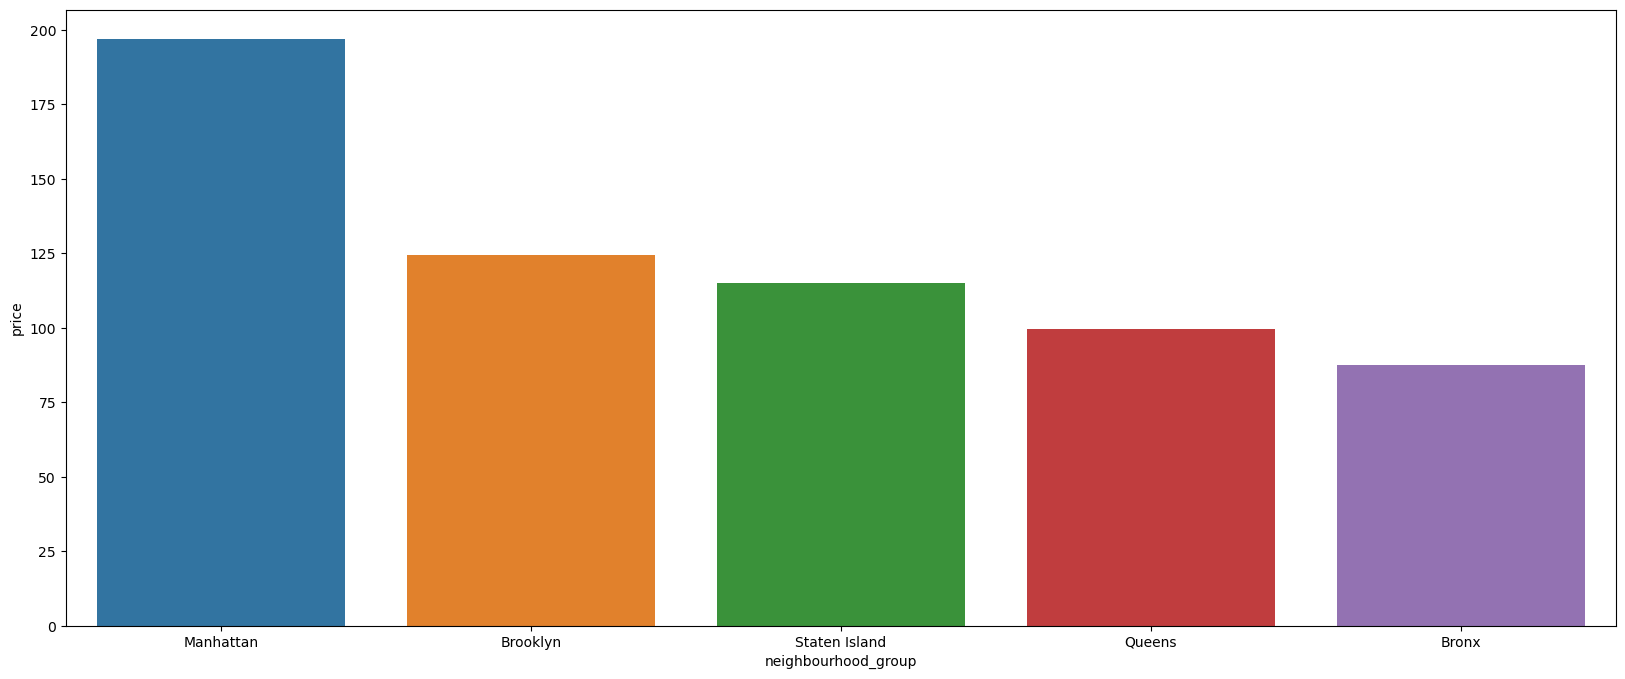

In [9]:
plt.figure(figsize=(20,8))
sns.barplot(data = airbnb_region_group, x=airbnb_region_group.index,y='price')
plt.show()

## 2. 비용이 상대적으로 적게 운영되는 지역을 확인 후 상권에 맞는 적정가격을 형성해봅시다.

숙박료 평균이 가장 낮은 Bronx 지역의 세부지역 평균 숙박료를 나타낸 것이다.

In [10]:
#상대적으로 저렴함 Bronx 지역의 세부지역 price를 조회해본 결과
min_region_group = airbnb.loc[airbnb['neighbourhood_group']=='Bronx'].groupby('neighbourhood').mean()[['price']].sort_values('price',ascending=False)
min_region_group

,price
neighbourhood,
Riverdale,442.090909
City Island,173.000000
Spuyten Duyvil,154.750000
Eastchester,141.692308
Unionport,137.142857
Westchester Square,122.200000
West Farms,122.000000
Van Nest,113.818182
Clason Point,112.761905


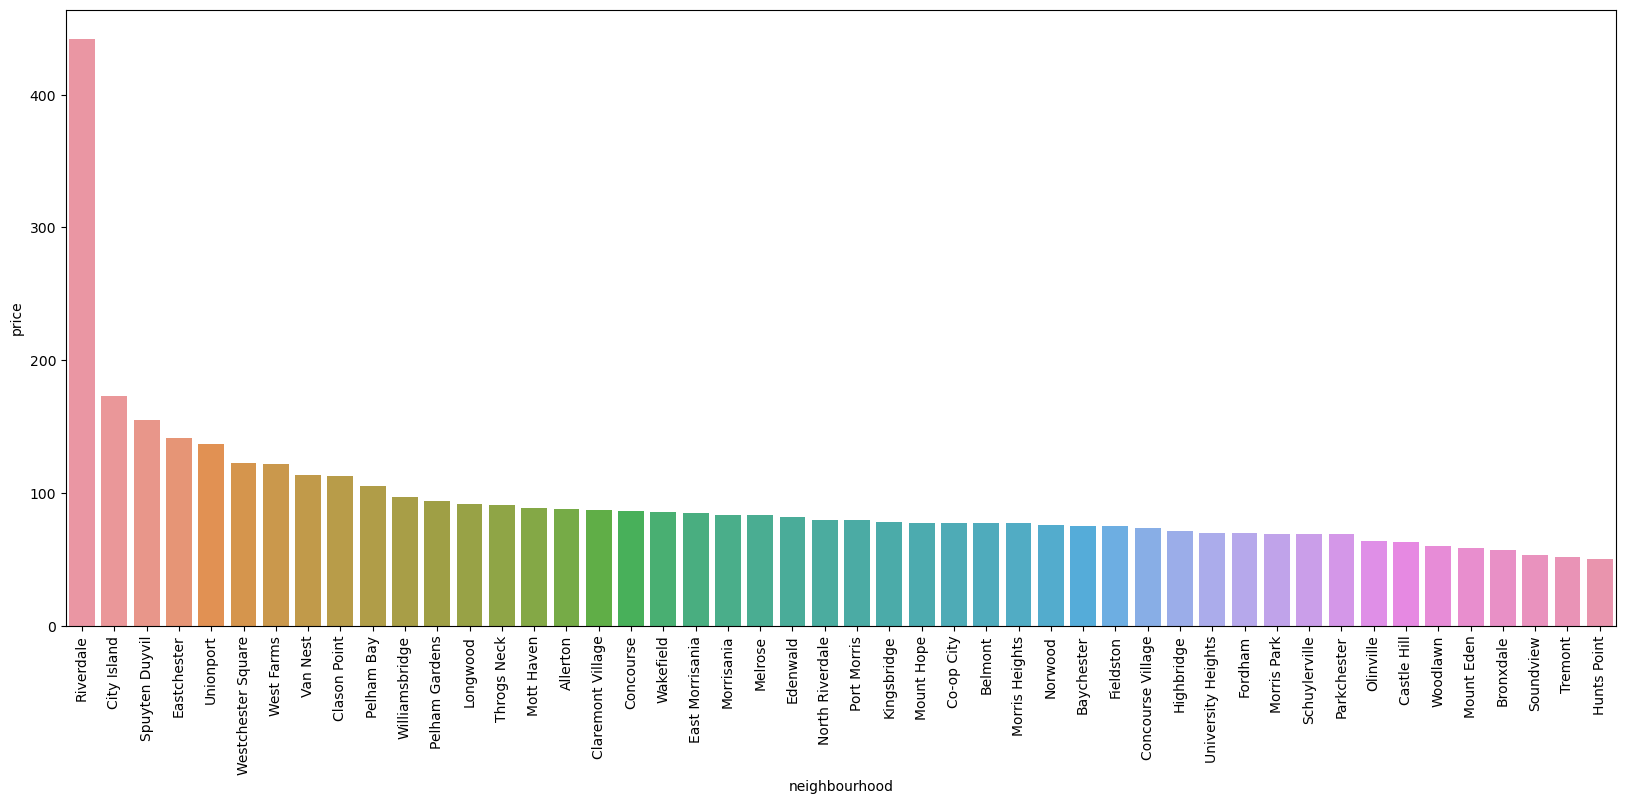

In [11]:
plt.figure(figsize=(20,8))
sns.barplot(data = min_region_group, x= min_region_group.index, y='price')
plt.xticks(rotation=90)
plt.show()

Riverdale 지역의 숙박료 가격이 월등히 높으며, 나머지 지역은 차이는 보이나 그 정도가 미미한 것을 알 수 있다. 따라서, 상권에 맞는 적정가격 측정은 Riverdale 지역의 가격은 제외하고 진행하는 것이 옳을 것이다.  

## 3. 2번 문제 해결 시, 가격 형성에 기준을 리뷰와 연관지어 해결한다면 좋을 것입니다. (여기선 고객들의 이용정보를 파악하기 힘들기 떄문에 리뷰칼럼을 인기있는 에어비앤비의 척도로 가정하고 연관지으면 좋을 것 같습니다. 특히, 리뷰가 많은부분과 최근에 남긴 리뷰의 데이터를 활용!)

### (1) 리뷰가 많은 부분

In [12]:
#상대적으로 저렴함 Bronx 지역의 세부지역 price, reviews_per_month 평균을 조회해본 결과
min_group_review = airbnb.loc[airbnb['neighbourhood_group']=='Bronx'].groupby('neighbourhood').mean()[['price','reviews_per_month']].sort_values('price',ascending=False)
min_group_review.drop('Riverdale',axis=0,inplace=True)
min_group_review

,price,reviews_per_month
neighbourhood,,
City Island,173.000000,2.049333
Spuyten Duyvil,154.750000,0.755000
Eastchester,141.692308,0.456000
Unionport,137.142857,3.042000
Westchester Square,122.200000,1.614444
West Farms,122.000000,0.395000
Van Nest,113.818182,1.995556
Clason Point,112.761905,1.602778
Pelham Bay,105.000000,2.010000


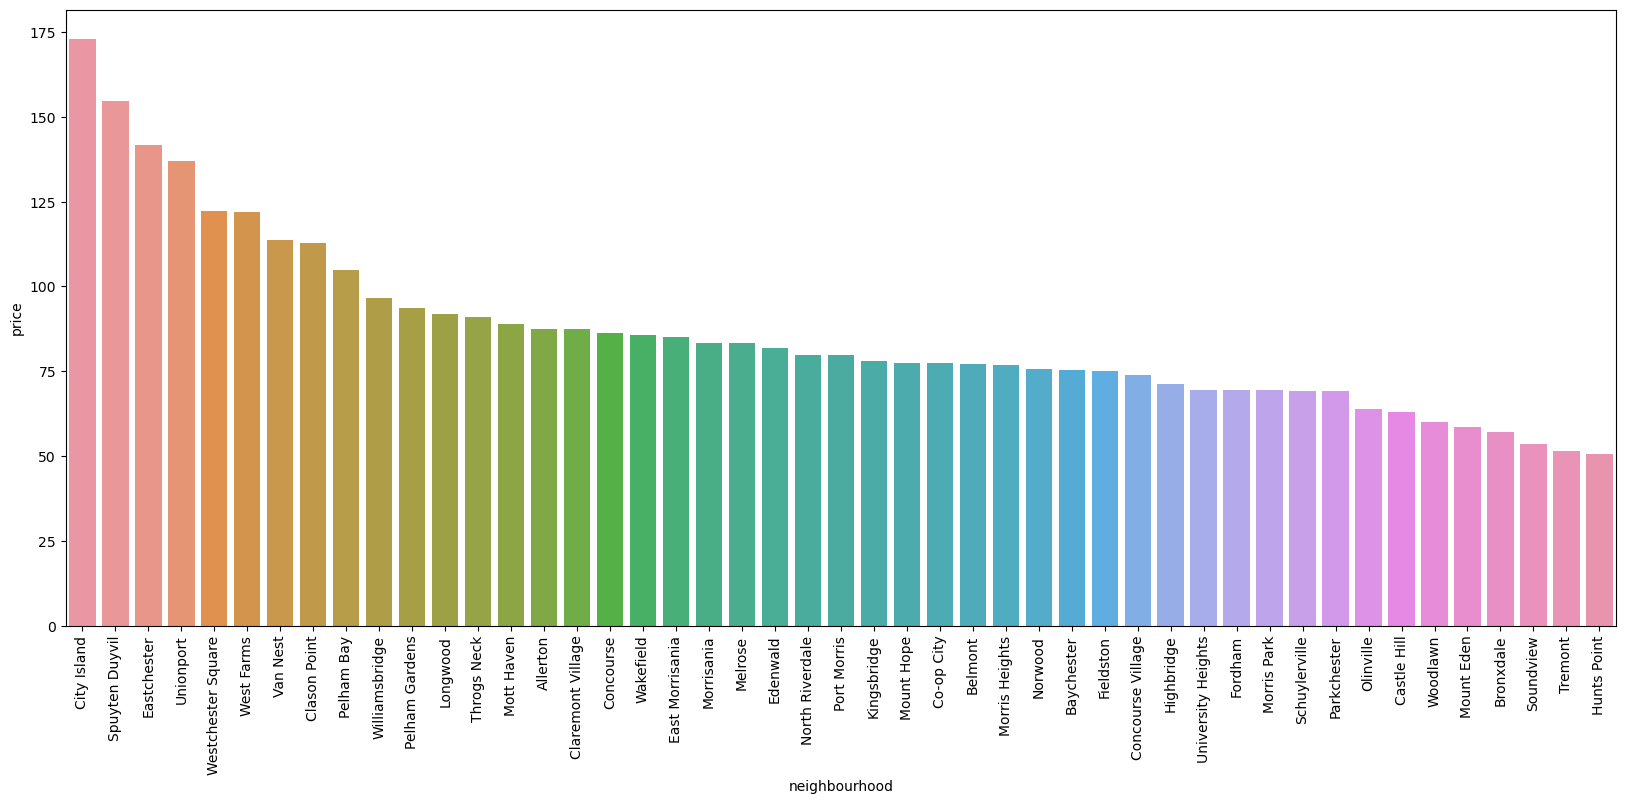

In [13]:
plt.figure(figsize=(20,8))
sns.barplot(data=min_group_review,x=min_group_review.index,y='price')
plt.xticks(rotation=90)
plt.show()

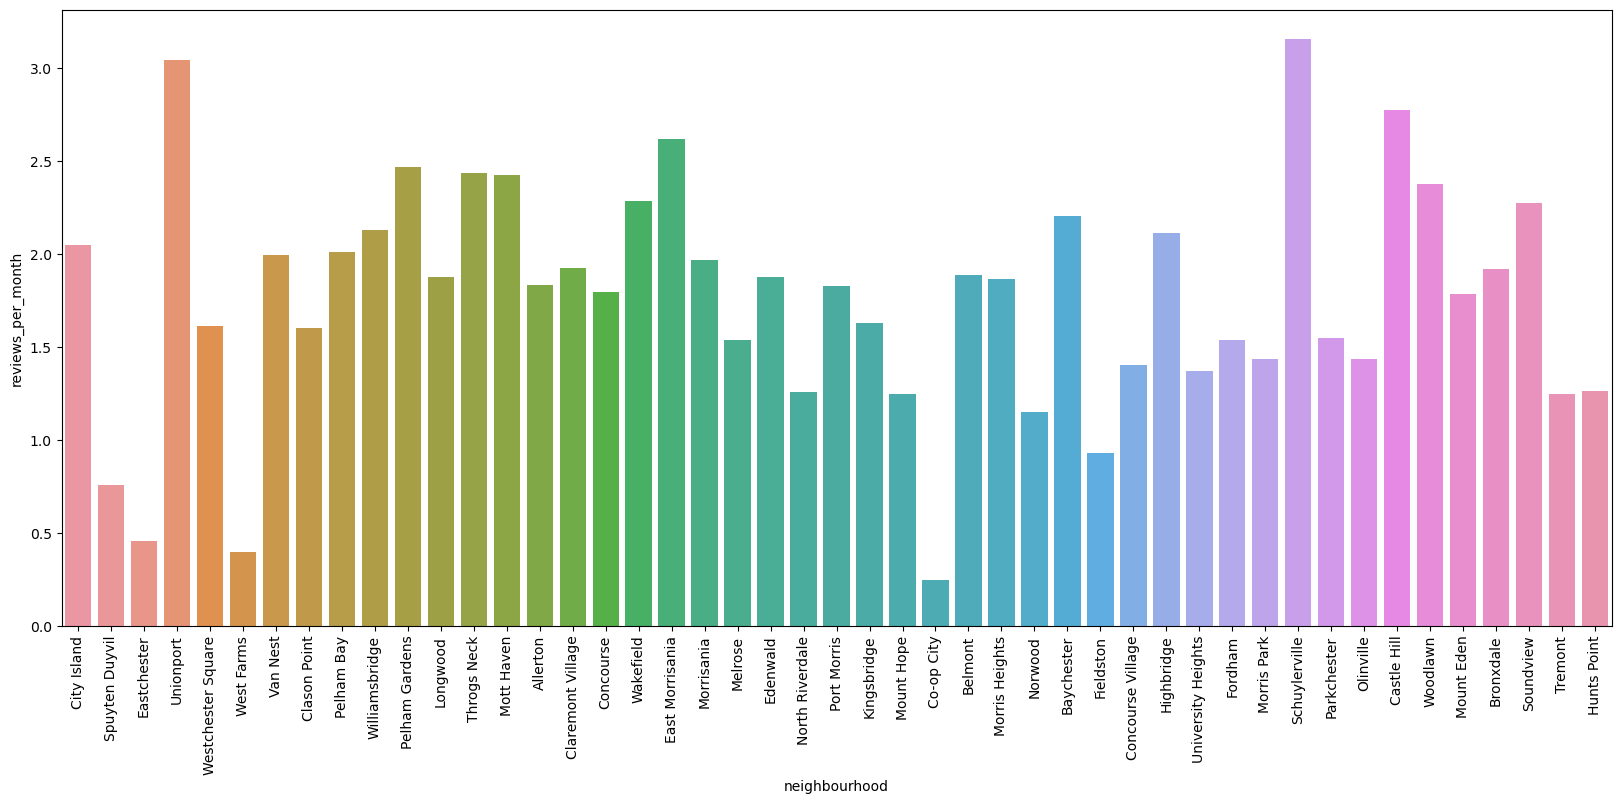

In [14]:
plt.figure(figsize=(20,8))
sns.barplot(data=min_group_review,x=min_group_review.index,y='reviews_per_month')
plt.xticks(rotation=90)
plt.show()

## 4. 또한 고객의 희망사항이 1,2인실을 여러개 만들어 에어비앤비를 희망하고 있습니다. 넉넉하지 않은 자본으로 1인실 제공을 여러개 운영하는 것을 목표로 하는것 같으니 선택한 지역에서의 비교를 통해 가격형성에 반영하면 좋을 것 같고, 다른 지역에서의 1인실 운영방식이나 인테리어등을 참고하여 마케팅에도 도움이 되도록 컨설팅을 하시기 바랍니다.

In [15]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Bronx지역의 룸 운영방식을 알아보자. minimum_nights, calculated_host_listings_count, availability_365 총 개 컬럼을 활용해보았다.

In [16]:
#상대적으로 저렴함 Bronx 지역의 세부지역 minimum_nights를 조회해본 결과
region_group_minimum_nights = airbnb.loc[airbnb['neighbourhood_group']=='Bronx'].groupby('neighbourhood').mean()[['minimum_nights']].sort_values('minimum_nights',ascending=False)
region_group_minimum_nights

,minimum_nights
neighbourhood,
Spuyten Duyvil,48.250000
North Riverdale,41.400000
Olinville,23.500000
Mount Hope,15.950000
Claremont Village,15.214286
Hunts Point,13.777778
Van Nest,7.090909
Williamsbridge,5.875000
Riverdale,5.363636


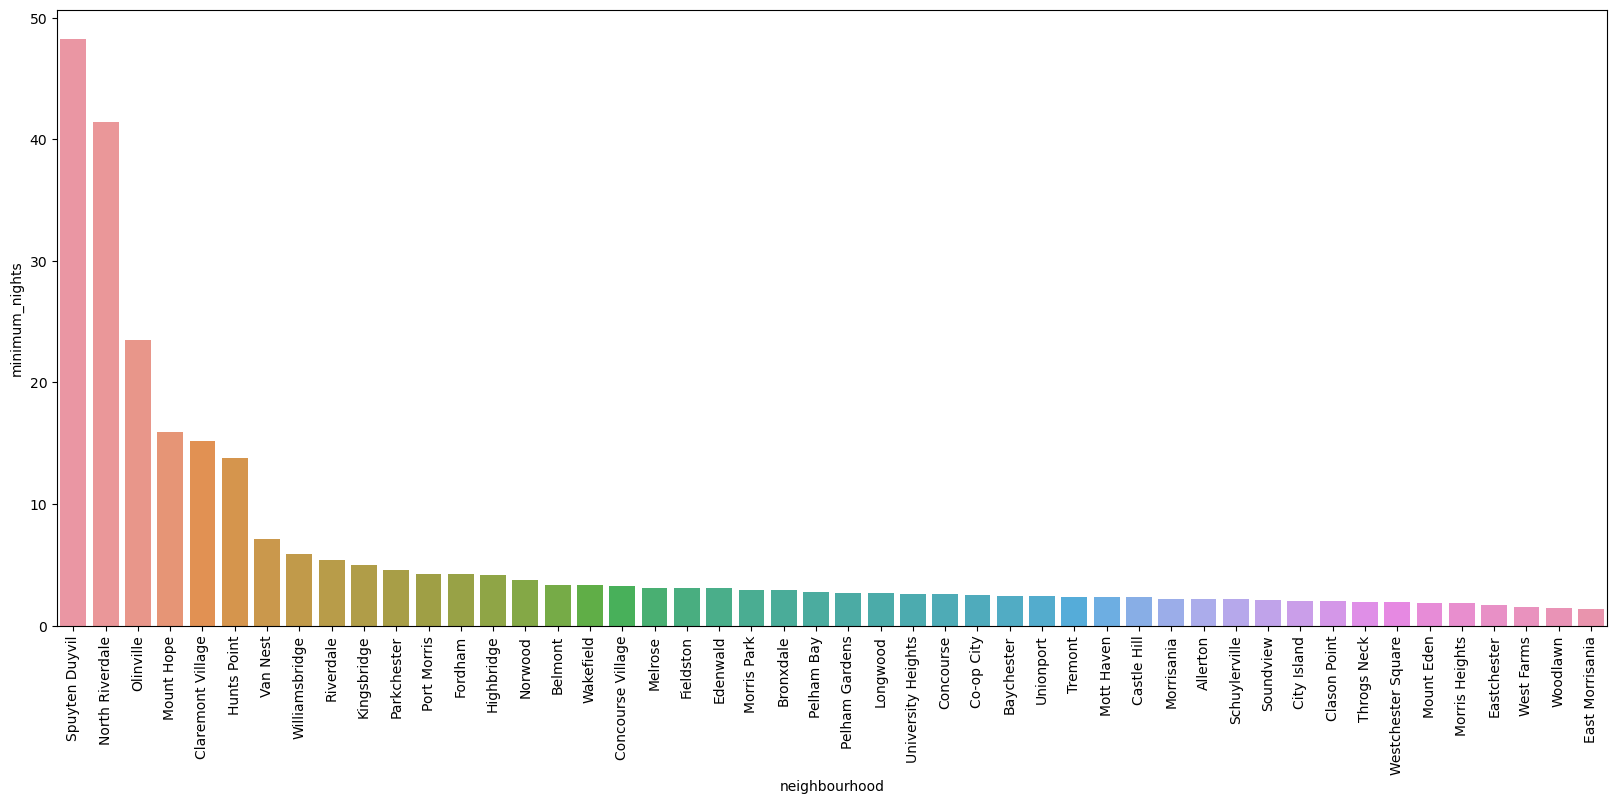

In [17]:
plt.figure(figsize=(20,8))
sns.barplot(data=region_group_minimum_nights,x=region_group_minimum_nights.index,y='minimum_nights')
plt.xticks(rotation=90)
plt.show()

neighbourhood별로 차이가 있으며 50일에 육박하는 지역부터 10미만의 지역까지 다양하게 minimum_nights의 분포를 보인다.
따라서 저렴한 지역인 'Bronx'에서 어느 neighbourhood을 정할 것이냐에 따라서 최소숙박일수를 그에 맞춰 정해야 할 것이다.

In [18]:
#상대적으로 저렴함 Bronx 지역의 세부지역 calculated_host_listings_count를 조회해본 결과
region_group_listings_count = airbnb.loc[airbnb['neighbourhood_group']=='Bronx'].groupby('neighbourhood').mean()[['calculated_host_listings_count']].sort_values('calculated_host_listings_count',ascending=False).head(20)
region_group_listings_count

,calculated_host_listings_count
neighbourhood,
Eastchester,12.076923
Co-op City,7.000000
Castle Hill,5.666667
Fordham,3.857143
Port Morris,3.652174
Hunts Point,3.555556
Clason Point,3.095238
Schuylerville,3.000000
Morris Park,2.933333


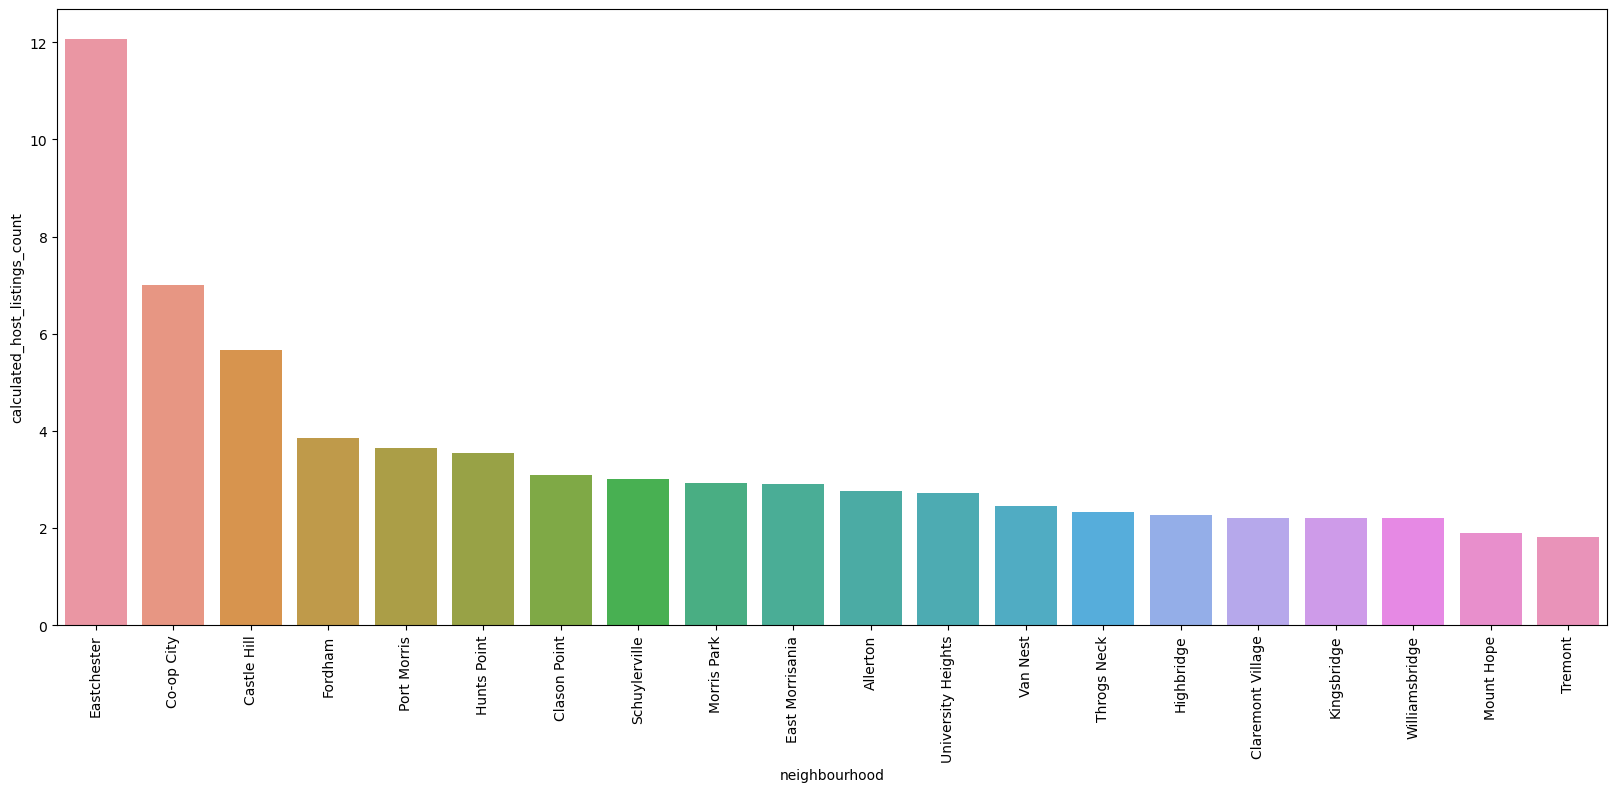

In [19]:
plt.figure(figsize=(20,8))
sns.barplot(data=region_group_listings_count,x=region_group_listings_count.index,y='calculated_host_listings_count')
plt.xticks(rotation=90)
plt.show()

In [20]:
#상대적으로 저렴함 Bronx 지역의 세부지역 availability_365를 조회해본 결과
region_group_availability = airbnb.loc[airbnb['neighbourhood_group']=='Bronx'].groupby('neighbourhood').mean()[['availability_365']].sort_values('availability_365',ascending=False).head(20)
region_group_availability

,availability_365
neighbourhood,
Co-op City,364.000000
Eastchester,333.461538
Spuyten Duyvil,270.000000
West Farms,244.500000
Unionport,244.000000
Hunts Point,239.166667
Clason Point,231.285714
Williamsbridge,224.450000
Edenwald,213.461538


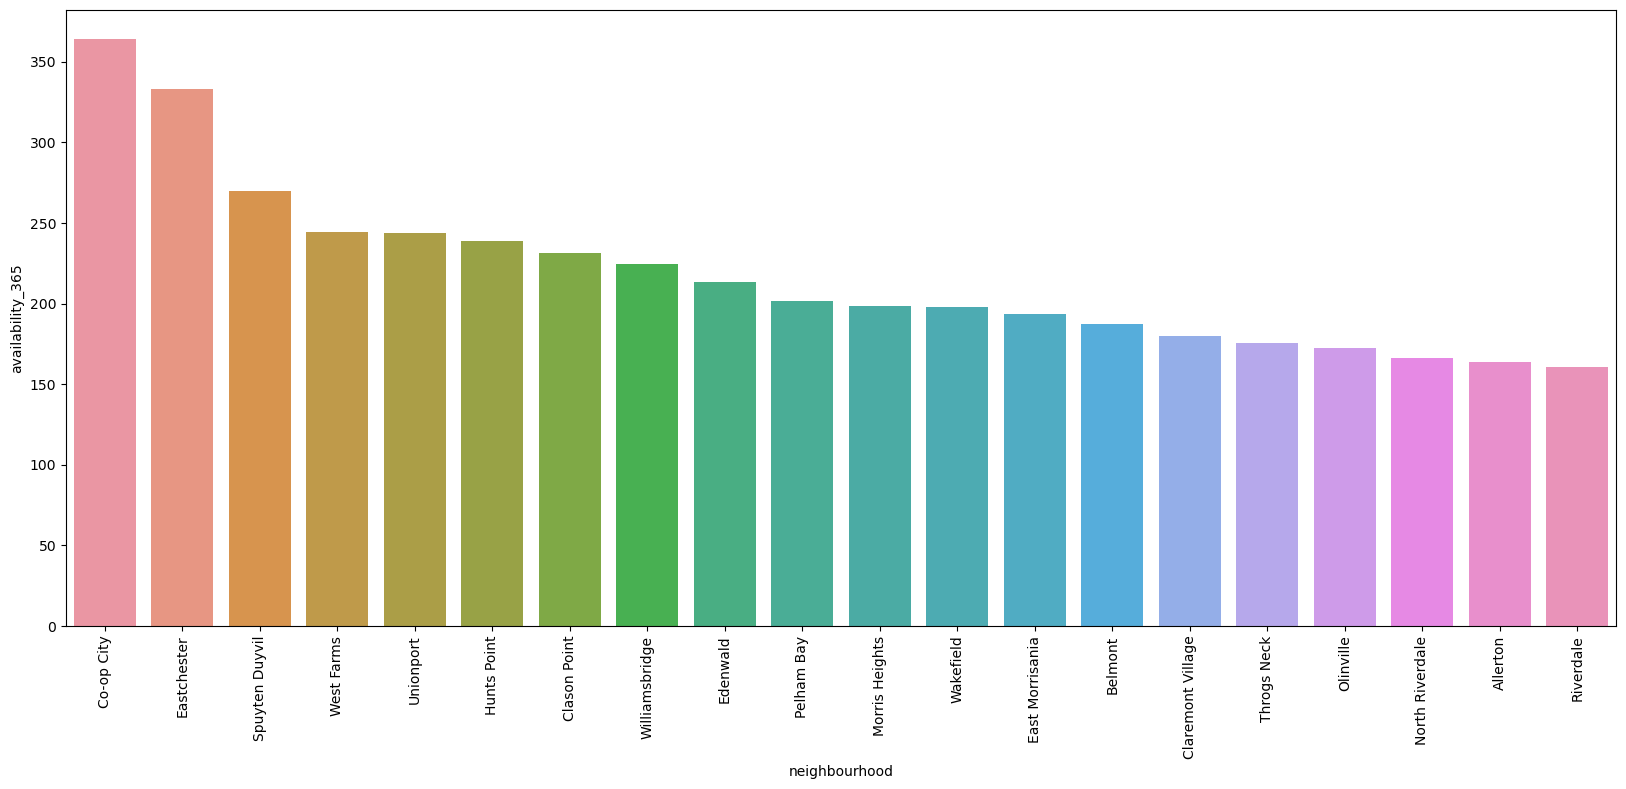

In [21]:
plt.figure(figsize=(20,8))
sns.barplot(data=region_group_availability,x=region_group_availability.index,y='availability_365')
plt.xticks(rotation=90)
plt.show()

* 토마스 건의드린 문제. host_id 컬럼을 통해 가장 많은 룸 갯수를 올린 호스트를 찾아보고, 그 호스트가 대여룸들을 어느 지역, 어느 가격에 책정하였으며, 이를 통해 신규사업자에게 도움이 될만한 인사이트를 추려내 정리해보자!

In [22]:
airbnb.groupby('host_id').count()[['price']].sort_values('price',ascending=False).head(20)

,price
host_id,
219517861,327
107434423,232
30283594,121
137358866,103
16098958,96
12243051,96
61391963,91
22541573,87
200380610,65


In [23]:
airbnb_30283594 = airbnb.loc[airbnb['host_id']==30283594.0]
airbnb_30283594

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9740,7491713,NYC Lavish Studio Apartment Steps from SoHo!,30283594,Kara,Manhattan,Financial District,40.70862,-74.01408,Entire home/apt,169,30,3,2018-12-07,0.09,121,364
10075,7730160,Furnished NYC 1BR apt near Rockefeller Center!!!,30283594,Kara,Manhattan,Theater District,40.75967,-73.98573,Entire home/apt,135,30,0,NaN,NaN,121,174
10335,7913426,LUX 1-Bedroom NYC Apartment Near Times Square!,30283594,Kara,Manhattan,Theater District,40.75654,-73.98891,Entire home/apt,369,30,0,NaN,NaN,121,364
10398,7966358,NYC High End 2BR Midtown West Apt,30283594,Kara,Manhattan,Midtown,40.76633,-73.98145,Entire home/apt,335,30,0,NaN,NaN,121,201
10490,8045421,NYC Chelsea Luxury 1BR Apt,30283594,Kara,Manhattan,Chelsea,40.74465,-73.99253,Entire home/apt,129,30,3,2017-12-31,0.07,121,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42128,32714098,Gorgeous 1 BR apt in NYC with breathtaking views!,30283594,Kara,Manhattan,Hell's Kitchen,40.76077,-74.00020,Entire home/apt,302,30,0,NaN,NaN,121,364
42129,32714417,"Modern, Deluxe 1 bedroom apt in prime of NYC!",30283594,Kara,Manhattan,Hell's Kitchen,40.76168,-73.99960,Entire home/apt,350,30,0,NaN,NaN,121,364
42130,32714435,Heart of NYC- deluxe 1BR apt with gorgeous views,30283594,Kara,Manhattan,Hell's Kitchen,40.76212,-73.99810,Entire home/apt,350,30,0,NaN,NaN,121,364
48529,36309944,Lavish 1br apartment in New York's Upper East ...,30283594,Kara,Manhattan,Upper East Side,40.76288,-73.95828,Entire home/apt,269,30,0,NaN,NaN,121,333


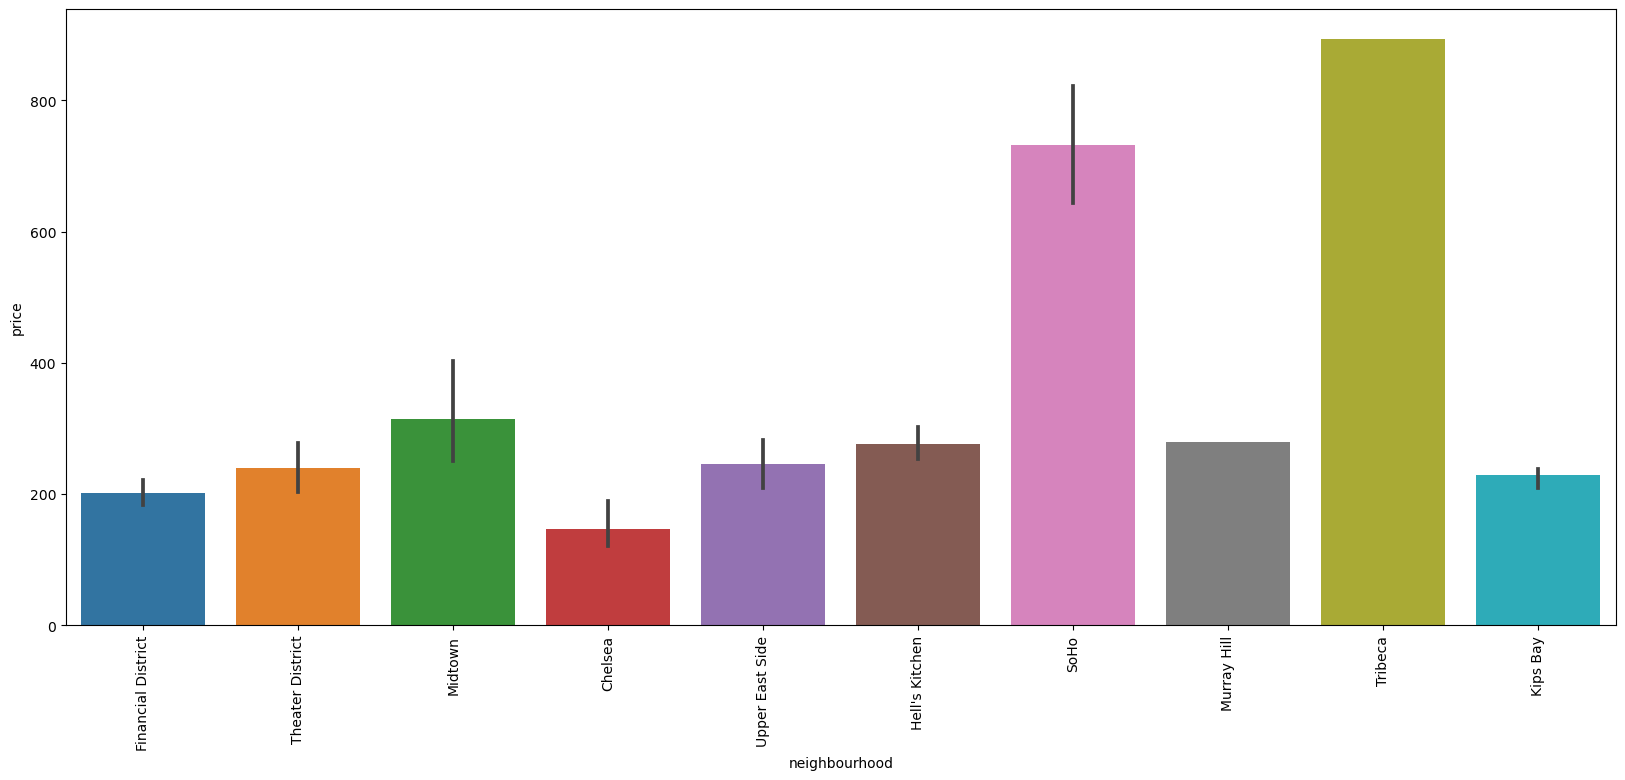

In [24]:
plt.figure(figsize=(20,8))
sns.barplot(data=airbnb_30283594,x='neighbourhood',y='price')
plt.xticks(rotation=90)
plt.show()

'host_id'==30283594.0 인 데이터 목록에서 이 특정 호스트의 지역별 금액의 대략적인 분포를 알 수 있다.

In [27]:
airbnb.loc[airbnb['host_id']==310670]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
261,63610,DOMINIQUE'S NY mini efficiency* wifi*metro*quiet,310670,Vie,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,2019-06-27,0.50,13,365
3050,1798500,DOMINIQUE'S NY*Wanderlust room/Metro/Bronx Zoo...,310670,Vie,Bronx,Co-op City,40.86317,-73.82494,Private room,75,2,32,2019-01-01,0.46,13,363
5612,4082062,Unique room w/2 Twin beds..wifi*metro* quiet*safe,310670,Vie,Bronx,Eastchester,40.88060,-73.83433,Private room,75,2,37,2019-06-16,0.73,13,364
5625,4093399,DOMINIQUE'S NY*chic* quiet room*wifi*metro,310670,Vie,Bronx,Eastchester,40.88009,-73.83442,Private room,68,2,41,2019-01-01,0.74,13,365
6927,4963237,"DOMINIQUE'S NYC cosy,2 bedrm crashPad*Stay h...",310670,Vie,Bronx,Eastchester,40.87829,-73.83471,Entire home/apt,155,2,11,2019-05-19,0.29,13,348
6928,4963511,Dominiq's NY cosy 3bedrm crashpad*metro*wifi*$...,310670,Vie,Bronx,Eastchester,40.88017,-73.83484,Entire home/apt,250,1,15,2019-06-02,1.08,13,357
8348,6421429,Dominique's LowerLevel 1 bdrm pad*video projects,310670,Vie,Bronx,Eastchester,40.88241,-73.83422,Entire home/apt,115,1,6,2019-06-30,0.18,13,364
10167,7791635,"Dominique's mini room NYC-sleep, shower & go*wifi",310670,Vie,Bronx,Eastchester,40.88001,-73.83450,Private room,62,2,5,2017-07-11,0.12,13,320
10168,7791636,**Dominique's NYC couch bed **sleep*shower & ...,310670,Vie,Bronx,Eastchester,40.88211,-73.83625,Shared room,45,1,1,2019-04-20,0.37,13,318
18887,14994076,Dominiques NYC 4Bedrm crashpad**Stay here**metro,310670,Vie,Bronx,Eastchester,40.88207,-73.83538,Entire home/apt,299,2,2,2019-05-21,0.18,13,358


In [38]:
airbnb2 = airbnb.loc[(airbnb['price']>=70)&(airbnb['price']<80)]
airbnb2.loc[(airbnb2['room_type']=='Private room')&(airbnb['neighbourhood_group']=='Bronx')]['host_id'].value_counts()

310670       3
23878336     3
105394139    2
106460468    2
295128       2
185908506    2
152636597    1
14969786     1
165607672    1
102896902    1
132669029    1
102501688    1
203266238    1
80543188     1
218840878    1
2557167      1
69713712     1
52889093     1
232283561    1
242816206    1
241236910    1
51614766     1
253690060    1
5547103      1
218116366    1
261891944    1
209915988    1
109671307    1
264840662    1
270852954    1
158344372    1
1939209      1
153826581    1
30499687     1
4096786      1
6586128      1
9122601      1
17658078     1
5476918      1
43583032     1
48249473     1
3784521      1
55395596     1
52196858     1
87370616     1
104584267    1
11342593     1
24546033     1
11196496     1
123458466    1
124486054    1
125687221    1
64425305     1
129890157    1
134160379    1
137690897    1
139013186    1
131697576    1
37678939     1
Name: host_id, dtype: int64

In [39]:
airbnb2.loc[airbnb2['host_id']==23878336]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
21188,16814382,Large Room in Home with Backyard Near Metro,23878336,Armando,Bronx,Fordham,40.87035,-73.89335,Private room,79,3,86,2019-06-24,2.88,10,78
21379,17045488,Huge Room in Home with Backyard Near Metro,23878336,Armando,Bronx,Fordham,40.87031,-73.89322,Private room,79,3,98,2019-06-24,3.45,10,68
46805,35454551,Spacious RM in Home w/Backyard/Balcony/Near Metro,23878336,Armando,Bronx,Fordham,40.86963,-73.89465,Private room,79,3,0,NaN,NaN,10,69
